# Do numpy arrays differ from Tensors?

https://medium.com/dailytech/numpy-arrays-vs-tensors-c58ea54f0e59

In [1]:
#import libraries
import os
import tensorflow as tf
import numpy as np
import time

print("TensorFlow version:", tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2022-10-13 15:05:48.860408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 15:05:49.159796: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-13 15:05:49.217699: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-13 15:05:49.975365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

TensorFlow version: 2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-10-13 15:05:51.216716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-13 15:05:51.284535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-13 15:05:51.285252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [5]:
# function performing operation and returning us the time.
def time_matmul(type,x):
  start = time.time()
  if type=='numpy':
    for loop in range(10):
      np.matmul(x,x)
      if (time.time()-start)*1000>20000:
        return 20000
  else:
    for loop in range(10):
      tf.matmul(x,x)
      if (time.time()-start)*1000>20000:
        return 20000
  diff = time.time() - start
  #return "{:0.2f}ms".format(1000*diff)
  return diff*1000

# Below three will store the shape, numpy time, cpu tensor time and gpu tensor time
# for evaluation
# time in ms
# MAKE SURE GPU IS SELECTED AS HARDWARE ACCELERATOR

shape_dim = []
num_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(500,5001,100):
  # Let's start with shape 500,500 to 10000,10000 with an increase of 100
  shape_dim.append(shape)

  # Numpy First
  x_np = np.random.uniform(size=[shape,shape])
  num_time.append(time_matmul('numpy',x_np))

  #Tensor in GPU
  with tf.device("GPU:0"): #Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([shape, shape])
    gpu_tf_time.append(time_matmul('gpu',x))
  
  #Tensor in CPU
  with tf.device("GPU:0"):
    x = tf.random.uniform([shape, shape])
    cpu_tf_time.append(time_matmul('cpu',x))

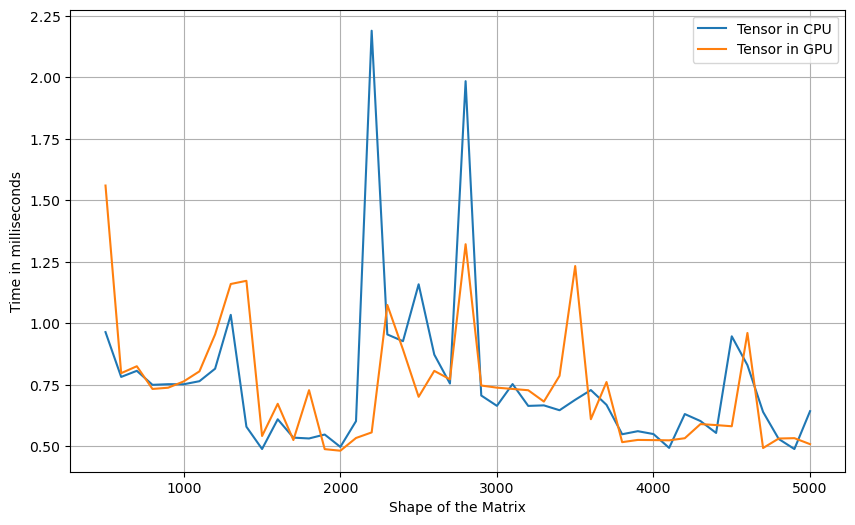

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(shape_dim,num_time,label="Numpy Array")
plt.plot(shape_dim,cpu_tf_time,label="Tensor in CPU")
plt.plot(shape_dim,gpu_tf_time,label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()

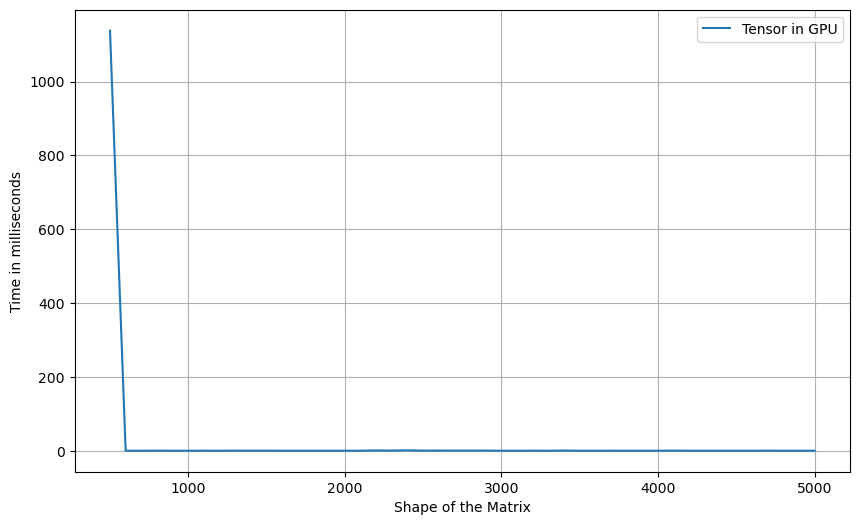

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(shape_dim,gpu_tf_time,label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()